In [16]:
import numpy as np
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
nobl_url = "../../Database/NonZacks/NOBL Holdings.csv"
df = pd.read_csv(nobl_url,header=[0], index_col=None)

tickers = df['Ticker']
price = []
for ticker in tickers:
    a = yf.download(ticker, start=datetime.now() - timedelta(days=4), progress=False)
    close = a['Close'].iloc[-1]
    price.append(close)
df['price'] = price
df.head()

,Weight,Ticker,Description,Exposure Value<br>(Notional + GL),Market Value,Shares/Contracts,price
0,1.65%,EMR,EMERSON ELECTRIC CO,--,"$191,701,274.10","1,805,947",106.150002
1,1.62%,CAT,CATERPILLAR INC,--,"$188,777,681.30","586,430",321.910004
2,1.60%,ECL,ECOLAB INC,--,"$186,727,567.80","866,968",215.380005
3,1.60%,DOV,DOVER CORP,--,"$185,953,966.40","1,151,703",161.460007
4,1.58%,CLX,CLOROX COMPANY,--,"$184,273,447.50","1,219,950",151.050003


In [22]:
sorted_df = df.sort_values(by="price")
less_than_50 = sorted_df[sorted_df["price"] <= 50]
less_than_50

,Weight,Ticker,Description,Exposure Value<br>(Notional + GL),Market Value,Shares/Contracts,price
56,1.42%,AMCR,AMCOR PLC,--,"$165,519,552.40","18,309,685",9.040000
63,1.36%,KVUE,KENVUE INC,--,"$158,948,761.40","8,343,767",19.049999
32,1.48%,BEN,FRANKLIN RESOURCES INC,--,"$172,936,468.30","6,341,638",27.270000
58,1.40%,HRL,HORMEL FOODS CORP,--,"$162,556,757.60","5,607,339",28.990000


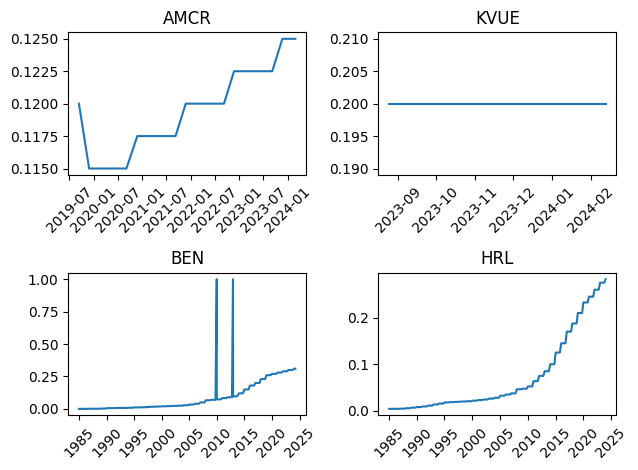

In [56]:
# polygon.io
# https://polygon-api-client.readthedocs.io/en/latest/Getting-Started.html
from polygon import RESTClient
import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
polygonAPIkey = "C1ArqE5IR4xXyDhViri8XNXGOdVQr1f7"
client = RESTClient(polygonAPIkey)

fig, ax = plt.subplots(2, 2)
rotates = 45
for i, ticker in enumerate(less_than_50["Ticker"]):
    divData = []
    dividendHistory = []
    counter = 0

    trades = []
    for t in client.list_dividends(ticker=ticker, limit=1000):
        divData.append(t)

        # create tuple and add to list
        tempTuple = (datetime.strptime(t.ex_dividend_date, "%Y-%m-%d"), t.cash_amount)
        dividendHistory.append(tempTuple)

        # print(counter)
        counter += 1
    a = pd.DataFrame(dividendHistory, columns=["Date", "Dividend"])
    a = a.set_index("Date")
    if i <= 1:
        ax[0, i].plot(a)
        ax[0, i].set_title(f"{ticker}")
        ax[0, i].tick_params(axis='x', rotation=rotates)
    else:
        ax[1, i-2].plot(a)
        ax[1, i-2].set_title(f"{ticker}")
        ax[1, i-2].tick_params(axis='x', rotation=rotates)
        
plt.tight_layout()
plt.show()

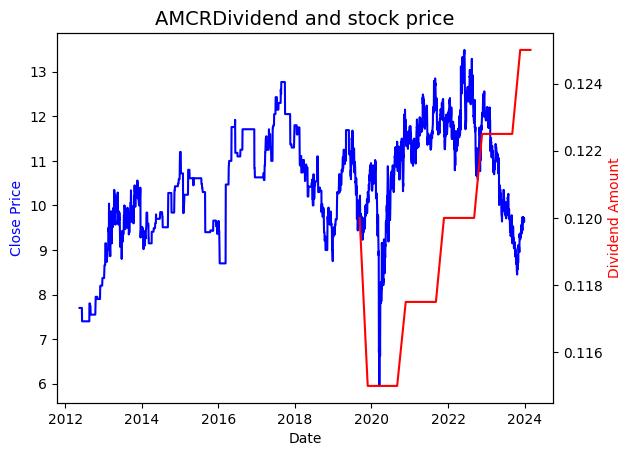

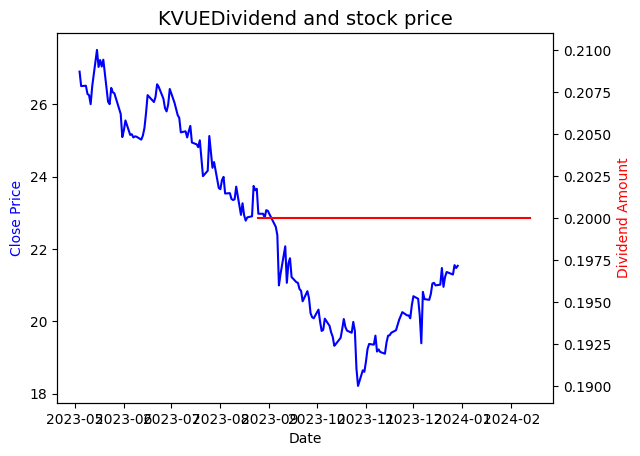

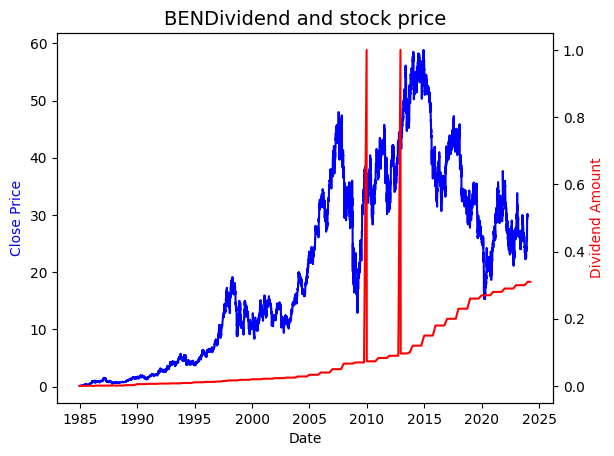

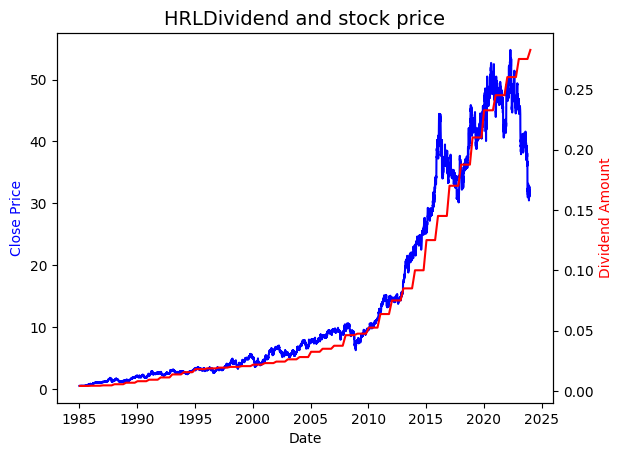

In [84]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
# Define the ticker symbol
for ticker_symbol in less_than_50["Ticker"]:
    data = yf.download(ticker_symbol, start="1985-01-01", end="2024-01-01", progress=False)
    close_prices = data["Close"]
    close_prices.index = pd.to_datetime(close_prices.index)


    divData = []
    dividendHistory = []
    counter = 0

    trades = []
    for t in client.list_dividends(ticker=ticker_symbol, limit=1000):
        divData.append(t)

        # create tuple and add to list
        tempTuple = (datetime.strptime(t.ex_dividend_date, "%Y-%m-%d"), t.cash_amount)
        dividendHistory.append(tempTuple)

        # print(counter)
        counter += 1

    a = pd.DataFrame(dividendHistory, columns=["Date", "Dividend"])
    a = a.set_index("Date")
    # Plotting
    fig, ax1 = plt.subplots()

    # # Plot the close prices
    ax1.plot(close_prices.index, close_prices, color='b', label='Close Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color='b')
    ax1.set_title(ticker_symbol + " Dividend and stock price", fontsize=14)

    ax2 = ax1.twinx()
    ax2.plot(a.index, a["Dividend"], color = "r")
    ax2.set_ylabel('Dividend Amount', color='r')
    plt.show()


In [33]:
dir(divData[0])

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cash_amount',
 'currency',
 'declaration_date',
 'dividend_type',
 'ex_dividend_date',
 'frequency',
 'from_dict',
 'pay_date',
 'record_date',
 'ticker']